In [2]:
import pandas as pd
%matplotlib inline
import glob


In [3]:
filenames = glob.glob("SOTU/*.txt")
contents = [open(filename).read() for filename in filenames]
sotu_df = pd.DataFrame({
    'content': contents,
    'filename': filenames
})
sotu_df.head(3)

,content,filename
0,Gentlemen of the Congress:\n\nIn pursuance of ...,SOTU/1913.txt
1,GENTLEMEN OF THE CONGRESS:\n\nThe session upon...,SOTU/1914.txt
2,GENTLEMEN OF THE CONGRESS:\n\nSince I last had...,SOTU/1915.txt


In [4]:
filepath = "NRC-Emotion-Lexicon-v0.92/NRC-emotion-lexicon-wordlevel-alphabetized-v0.92.txt"
emolex_df = pd.read_csv(filepath,  names=["word", "emotion", "association"], skiprows=45, sep='\t')
emolex_df = emolex_df.pivot(index='word', columns='emotion', values='association').reset_index()
emolex_df.head()

emotion,word,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
0,aback,0,0,0,0,0,0,0,0,0,0
1,abacus,0,0,0,0,0,0,0,0,0,1
2,abandon,0,0,0,1,0,1,0,1,0,0
3,abandoned,1,0,0,1,0,1,0,1,0,0
4,abandonment,1,0,0,1,0,1,0,1,1,0


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer(vocabulary = emolex_df.word,
                      use_idf=False, 
                      norm='l1') # ELL - ONE
matrix = vec.fit_transform(sotu_df['content'])
vocab = vec.get_feature_names()
sotu_wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
# sotu_wordcount_df[['america','we','nation']].head()
sotu_wordcount_df.head()

,aback,abacus,abandon,abandoned,abandonment,abate,abatement,abba,abbot,abbreviate,...,zephyr,zeppelin,zest,zip,zodiac,zone,zoo,zoological,zoology,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000923,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
negative_words = emolex_df[emolex_df.negative == 1]['word']
joyful_words = emolex_df[emolex_df.joy == 1]['word']

In [7]:
sotu_df['negativity'] = sotu_wordcount_df[negative_words].sum(axis=1)
sotu_df['joyful'] = sotu_wordcount_df[joyful_words].sum(axis=1)

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
vocabulary=['america', 'we', 'nation']
vec = TfidfVectorizer(use_idf=False, 
                      norm='l1') # ELL - ONE
matrix = vec.fit_transform(sotu_df['content'])
vocab = vec.get_feature_names()
sotu_wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
# sotu_wordcount_df[['america','we','nation']].head()
sotu_wordcount_df[vocabulary].head()

,america,we,nation
0,0.000574,0.011761,0.001147
1,0.001123,0.029425,0.001572
2,0.001836,0.015078,0.001836
3,0.000000,0.004337,0.001928
4,0.000259,0.015301,0.002334


In [9]:
sotu_df['unity'] = sotu_wordcount_df[vocabulary].sum(axis=1)

In [10]:
sotu_df.head()

,content,filename,negativity,joyful,unity
0,Gentlemen of the Congress:\n\nIn pursuance of ...,SOTU/1913.txt,0.096346,0.076412,0.013483
1,GENTLEMEN OF THE CONGRESS:\n\nThe session upon...,SOTU/1914.txt,0.121884,0.105263,0.032120
2,GENTLEMEN OF THE CONGRESS:\n\nSince I last had...,SOTU/1915.txt,0.122637,0.085335,0.018749
3,GENTLEMEN OF THE CONGRESS:\n\nIn fulfilling at...,SOTU/1916.txt,0.092334,0.080139,0.006265
4,Gentlemen of the Congress:\n\nEight months hav...,SOTU/1917.txt,0.199780,0.097695,0.017894


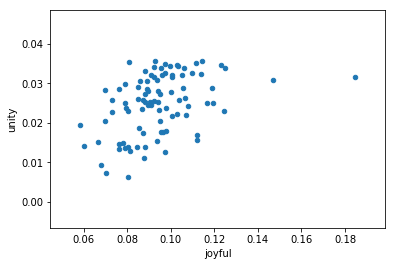

In [11]:
sotu_df.plot(y="unity", x="joyful", kind="scatter")